<a href="https://colab.research.google.com/github/PKvasnick/RTutorial/blob/master/code/R01_PrveKroky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ako chutí R

Kým začnete písať R, urobíme niečo jednoduché, aby ste mali predstavu, kade povedú naše ďalšie kroky. 

## R notebook
Nachádzame sa v Google Colab R notebooku. Notebook pozostáva 

* z blokov textu, ako je tento, s Markdown formátovaním

* z blokov kódu, ktoré majú na kraji šípku pre spustenie. 

* z blokov výstupu, obsahujúcich textový a grafický výstup kódu z predchádzajúceho poľa. 

Výhoda notebooku je v tom, že tu máte pohromade text, kód aj výstupy kódu. Okrem toho vám notebook umožňuje vytvárať kód postupne a interaktívne. 

Kód v poli vykonáme stlačením __Ctrl+Enter__ alebo kliknutím na šípku na ľavom okraji bloku.

V kontextovom menu hore nájdete ďalšie voľby pre prácu so súborom, napríklad spustenie celého kódu, export alebo tlač. 

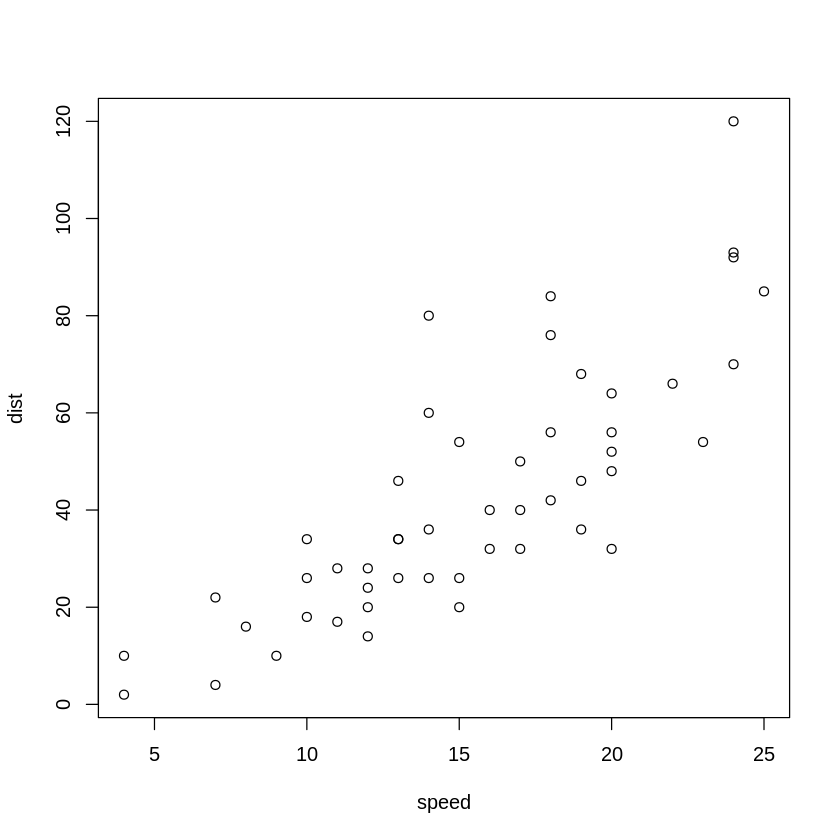

In [ ]:
plot(cars)

## Ukážkové dátové súbory v R

Zjavne sme niečo nakreslili, ale čo je `cars`?

Je to ukážkový dátový súbor, ktorý máte k dispozícii spolu so záklanými balíčkami pri spustení R. 

__Recept__ Keď v R niečo stretnem a neviem čo to je, prvá vec, ktorú skúsim, je `help(cars)`, __Ctrl-Enter__ pre spustenie, a kuk doprava, kde sa zobrazil panel s vysvetlením.

Aha, takže mám výsledky merania brzdnej dráhy v závislosti od počiatočnej rýchlosti vozidla spred 100 rokov. Všimnite si, ako help dokumentuje obsah polí. 

Poďme sa pozrieť, ako vyzerajú naše dáta:

In [ ]:
help(cars)

In [ ]:
head(cars)

,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


In [ ]:
nrow(cars)
ncol(cars)

[1] 50

[1] 2

`head` preto, lebo nám stačí hlavička a niekoľko prvých riadkov. 

## R data frame

Vidíme tabuľku, vieme, že má 50 riadkov a 3 stĺpce. 

* Stĺpec úplne vľavo nemá meno a volá sa *index*, slúži na jednoznačné označenie riadkov v tabuľke. 
* *Riadky* zodpovedajú jednotlivým prípadom, pacientom, vzorkám. 
* *Stĺpce* zodpovedajú vlastnostiam prípadov, pacientov, vzoriek.

Toto je typický spôsob usporiadania dát pre štatistickú analýzu (nielen v R) a spotrebujeme dosť času, aby sme sa naučili svoje dáta takto usporiadať. 


## Aká to je závislosť?

Tak máme nejaké dáta, a čo to je za závislosť? 

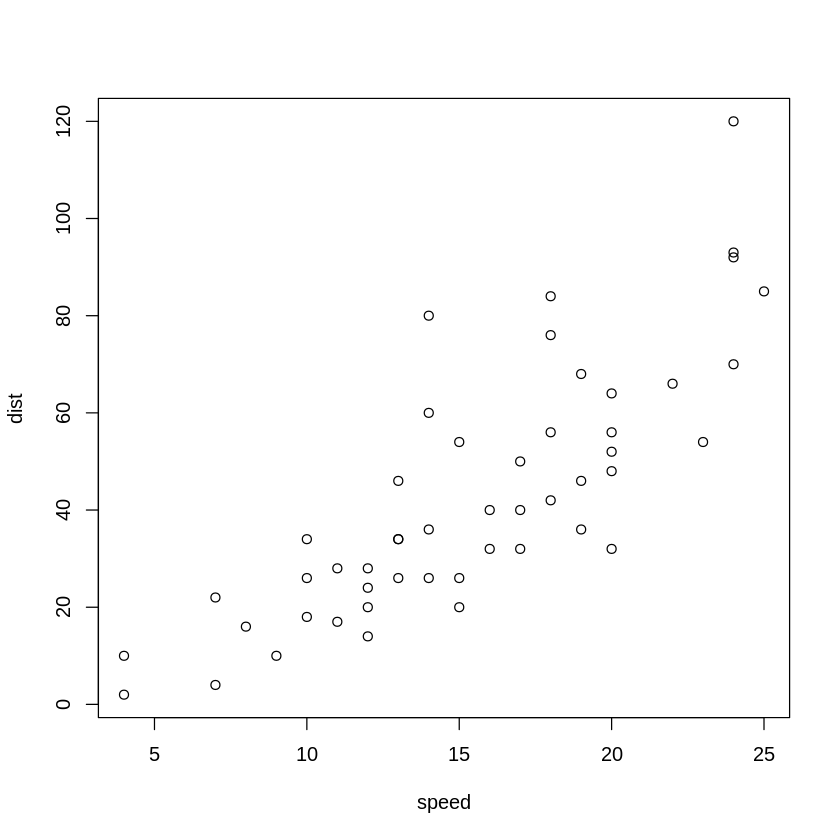

In [ ]:
plot(cars)

__Úloha:__: Ako uložíme obrázok do súboru? Spýtajte sa Googlu.

__Tip__: Ak sa notebook začne chovať čudne, vždy pomôže __Runtime -> Restart runtime__, pričom si môžete vybrať, čo sa má stať po reštarte.

Poďme to nakresliť poriadne. 

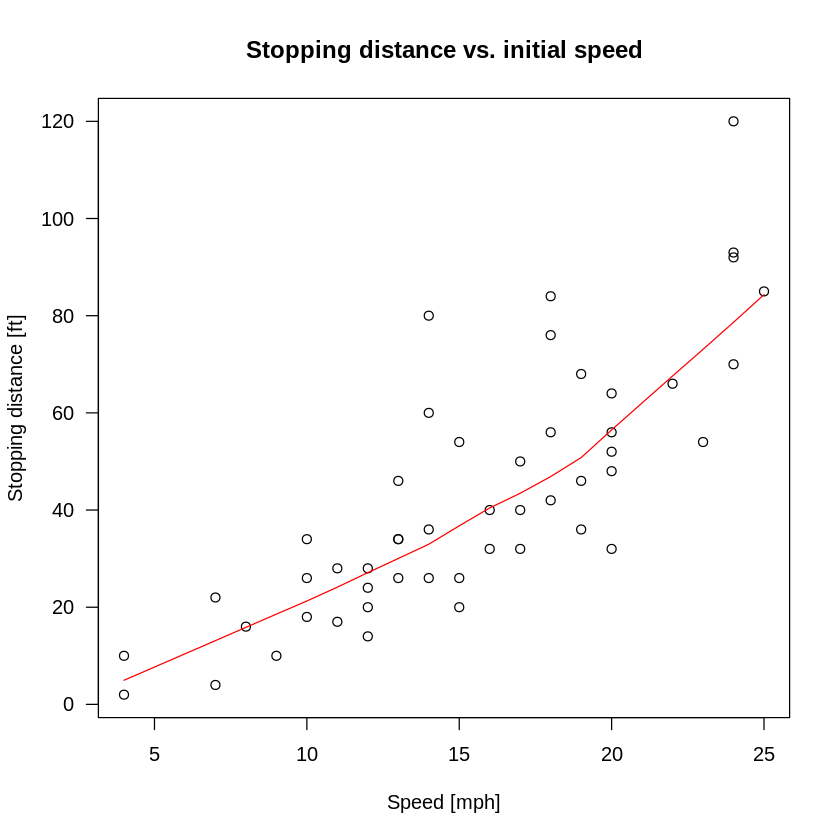

In [ ]:
plot(cars, xlab = "Speed [mph]", ylab = "Stopping distance [ft]", las = 1)
lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
title(main="Stopping distance vs. initial speed")

__Úloha__: Kto netuší čo je *lowess*, čo spraví?

__Recept__: stĺpce dátovej tabuľky sú data$<meno_stlpca>

Vyzerá to ako parabola, tak si to nakreslime v logaritmickej škále:


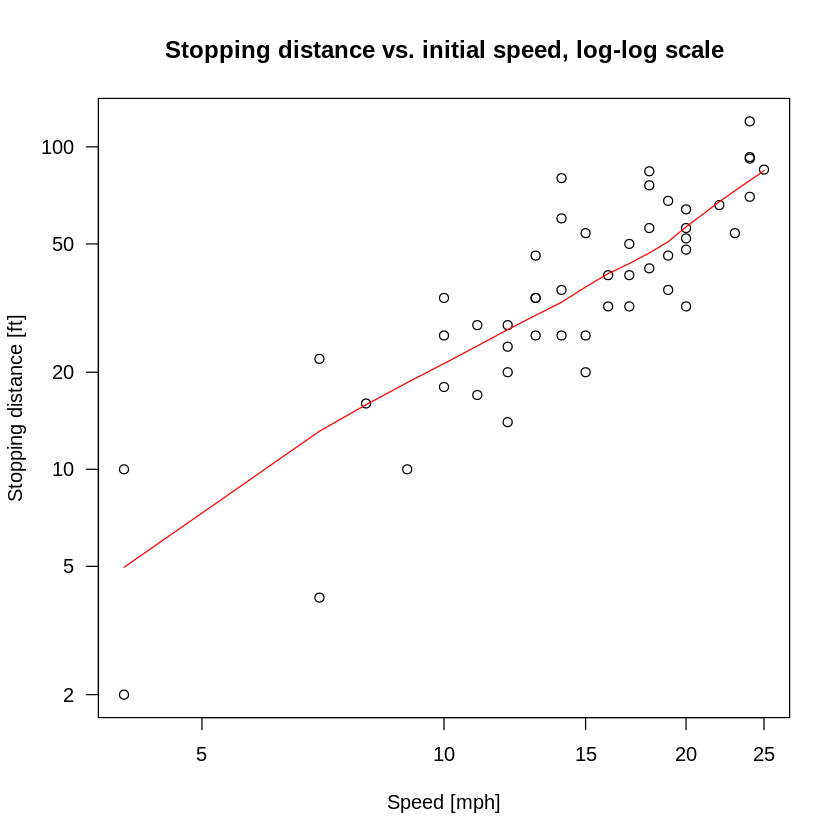

In [ ]:
plot(cars, xlab = "Speed [mph]", ylab = "Stopping distance [ft]", las = 1, log = "xy")
lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
title(main="Stopping distance vs. initial speed, log-log scale")

__Úloha__: Funguje slovenská diakritika? Skúste poslovenčiť popisy osí.


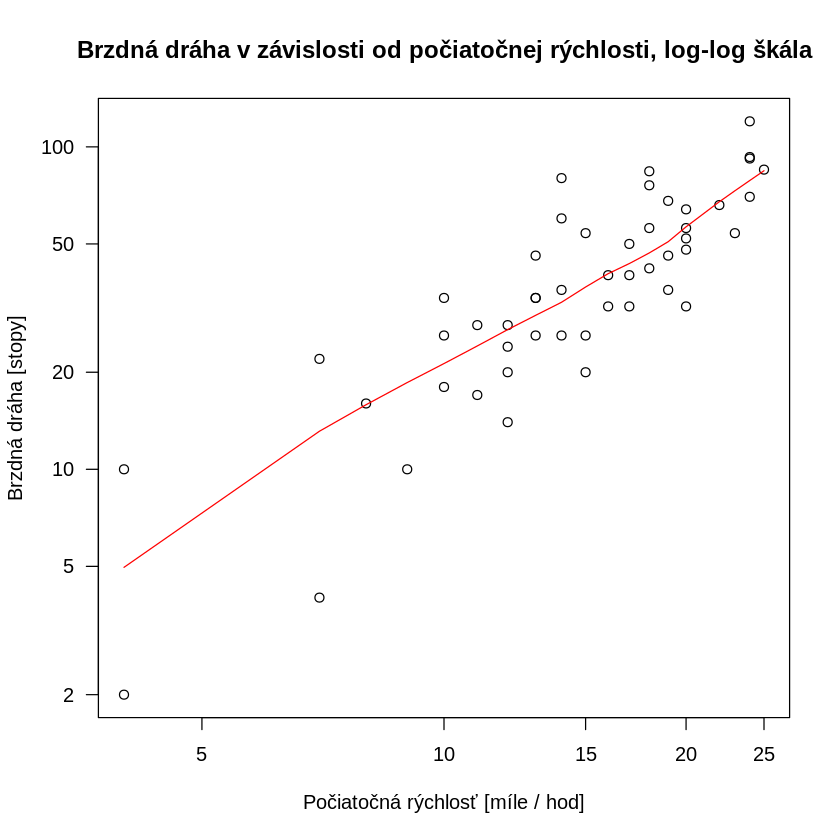

In [ ]:
plot(cars, xlab = "Počiatočná rýchlosť [míle / hod]", ylab = "Brzdná dráha [stopy]", las = 1, log = "xy")
lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
title(main="Brzdná dráha v závislosti od počiatočnej rýchlosti, log-log škála")

Naša závislosť vyzerá ako priamka, tak skúsme dáta preložiť priamkou. __POZOR__ začína štatistika!


Call:
lm(formula = log(dist) ~ log(speed), data = cars)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00215 -0.24578 -0.02898  0.20717  0.88289 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.7297     0.3758  -1.941   0.0581 .  
log(speed)    1.6024     0.1395  11.484 2.26e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4053 on 48 degrees of freedom
Multiple R-squared:  0.7331,	Adjusted R-squared:  0.7276 
F-statistic: 131.9 on 1 and 48 DF,  p-value: 2.259e-15


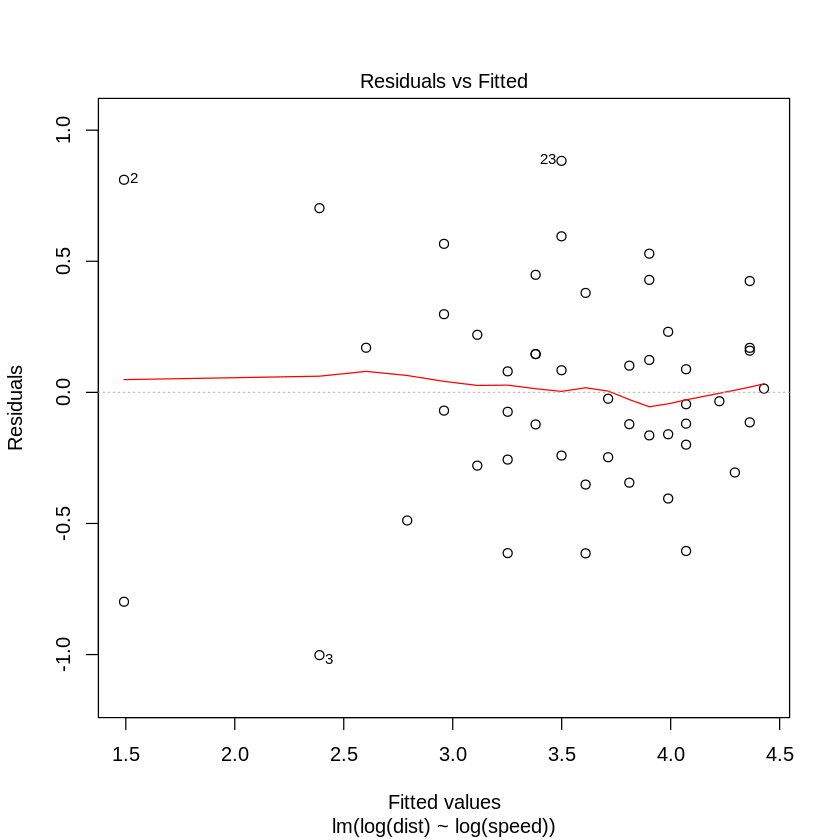

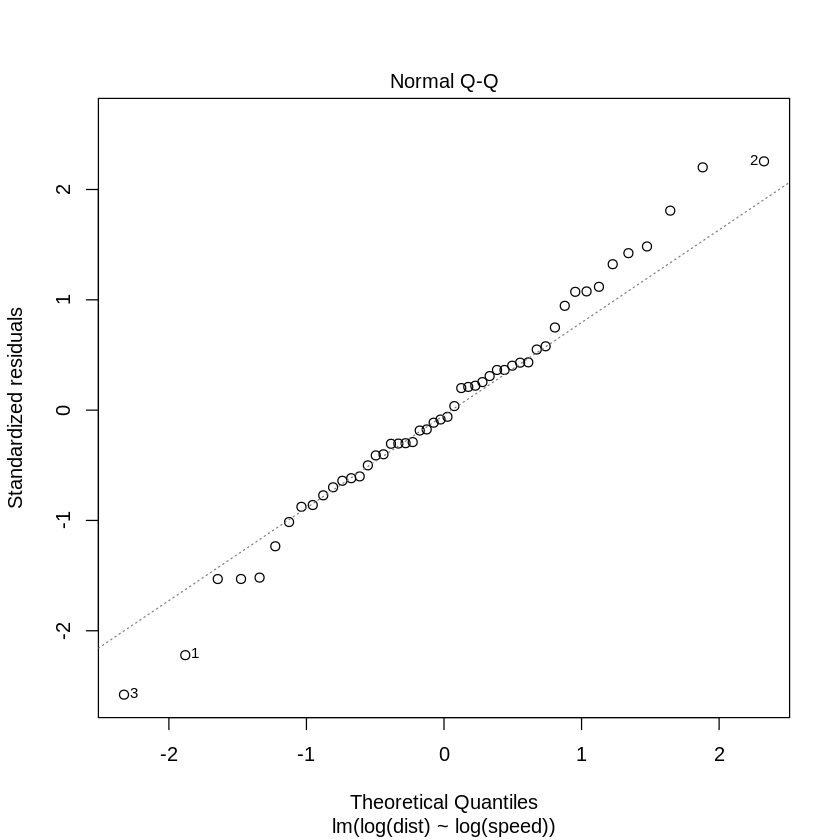

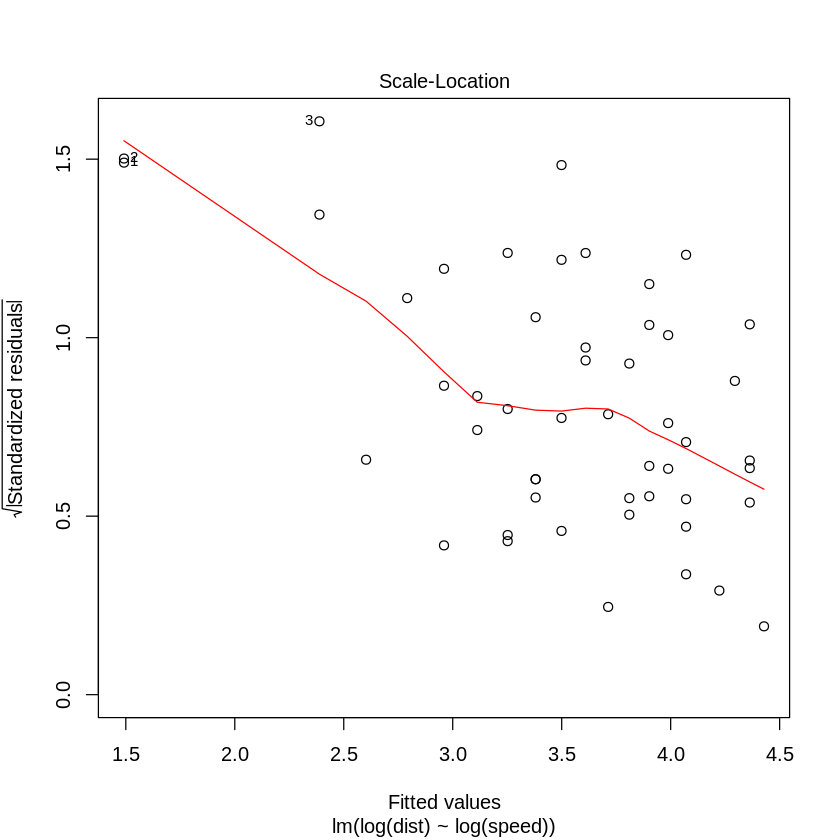

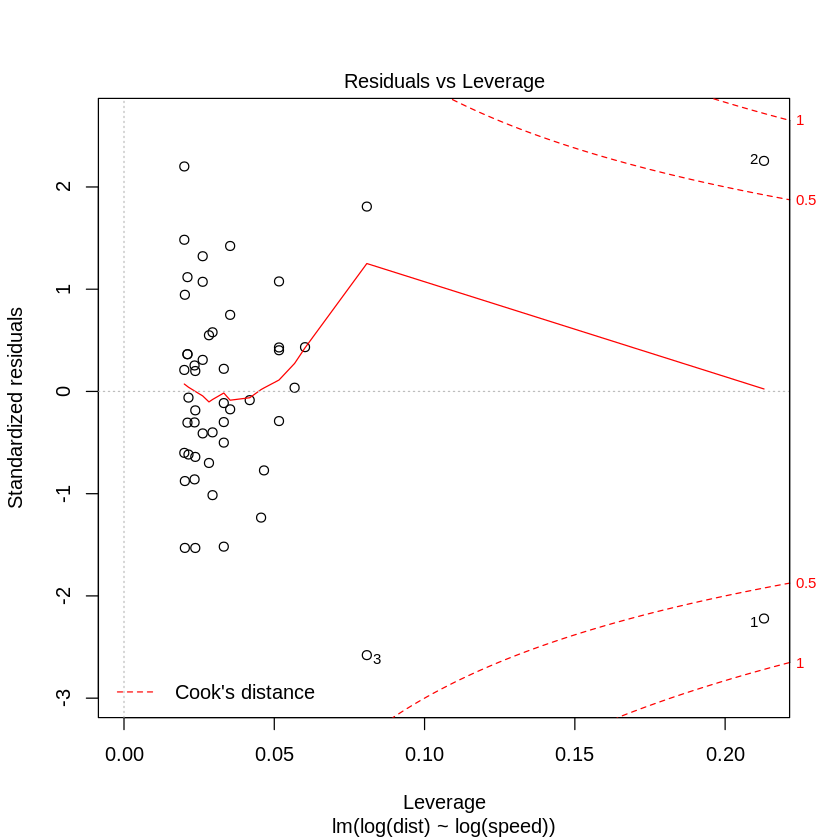

In [ ]:
fmL <- lm(log(dist) ~ log(speed), data = cars)
summary(fmL)
plot(fmL)

Máme tu kopu výstupov. 

Z textového výstupu vidíme, že máme celkom dobrý model: 

$$d = e^{-0.73}v^{1.6}$$

*E3te vidíme, že môžeme písať aj vzorce v TeX-ovej notácii!*

Záverečným kliknutím na __Preview__ (alebo __Ctrl-Shift-K__) si zobrazíme výsledný dokument. 

__Úloha__: Vyhľadajte si na Googli všetko, čomu nerozumiete. Alebo sa spýtajte.

__Úloha__: Čo keby som vo výstupe nechcel R-kód? 

__Úloha__: Viem report vytlačiť do pdf?
